In [1]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [4]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import pandas as pd
# import cv2
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
#Getting the data
batch_size = 128
target_size = (512,512)
train_dir = "fer2013plus/fer2013plus/fer2013/train/"
test_dir = "fer2013plus/fer2013plus/fer2013/test/"
train_dataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               horizontal_flip=True,
                                                               zoom_range=0.2,
                                                               shear_range=0.2,
                                                               rotation_range=30,
                                                                width_shift_range=0.2,
                                                                height_shift_range = 0.2,
                                                               validation_split=0.2)
train_ds = train_dataGenerator.flow_from_directory(train_dir,
                                                        batch_size=batch_size,
                                                        target_size=target_size, 
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        color_mode="grayscale", 
                                                        subset='training')
validation_ds = train_dataGenerator.flow_from_directory(train_dir,
                                                        batch_size=batch_size,
                                                        target_size=target_size,
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        color_mode="grayscale", 
                                                        subset='validation')

test_dataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                              horizontal_flip=True)
test_ds = test_dataGenerator.flow_from_directory(test_dir,
                                                  batch_size=batch_size,
                                                  target_size=target_size,
                                                  shuffle=True,
                                                  color_mode="grayscale", 
                                                  class_mode="categorical")

Found 22712 images belonging to 8 classes.
Found 5674 images belonging to 8 classes.
Found 7099 images belonging to 8 classes.


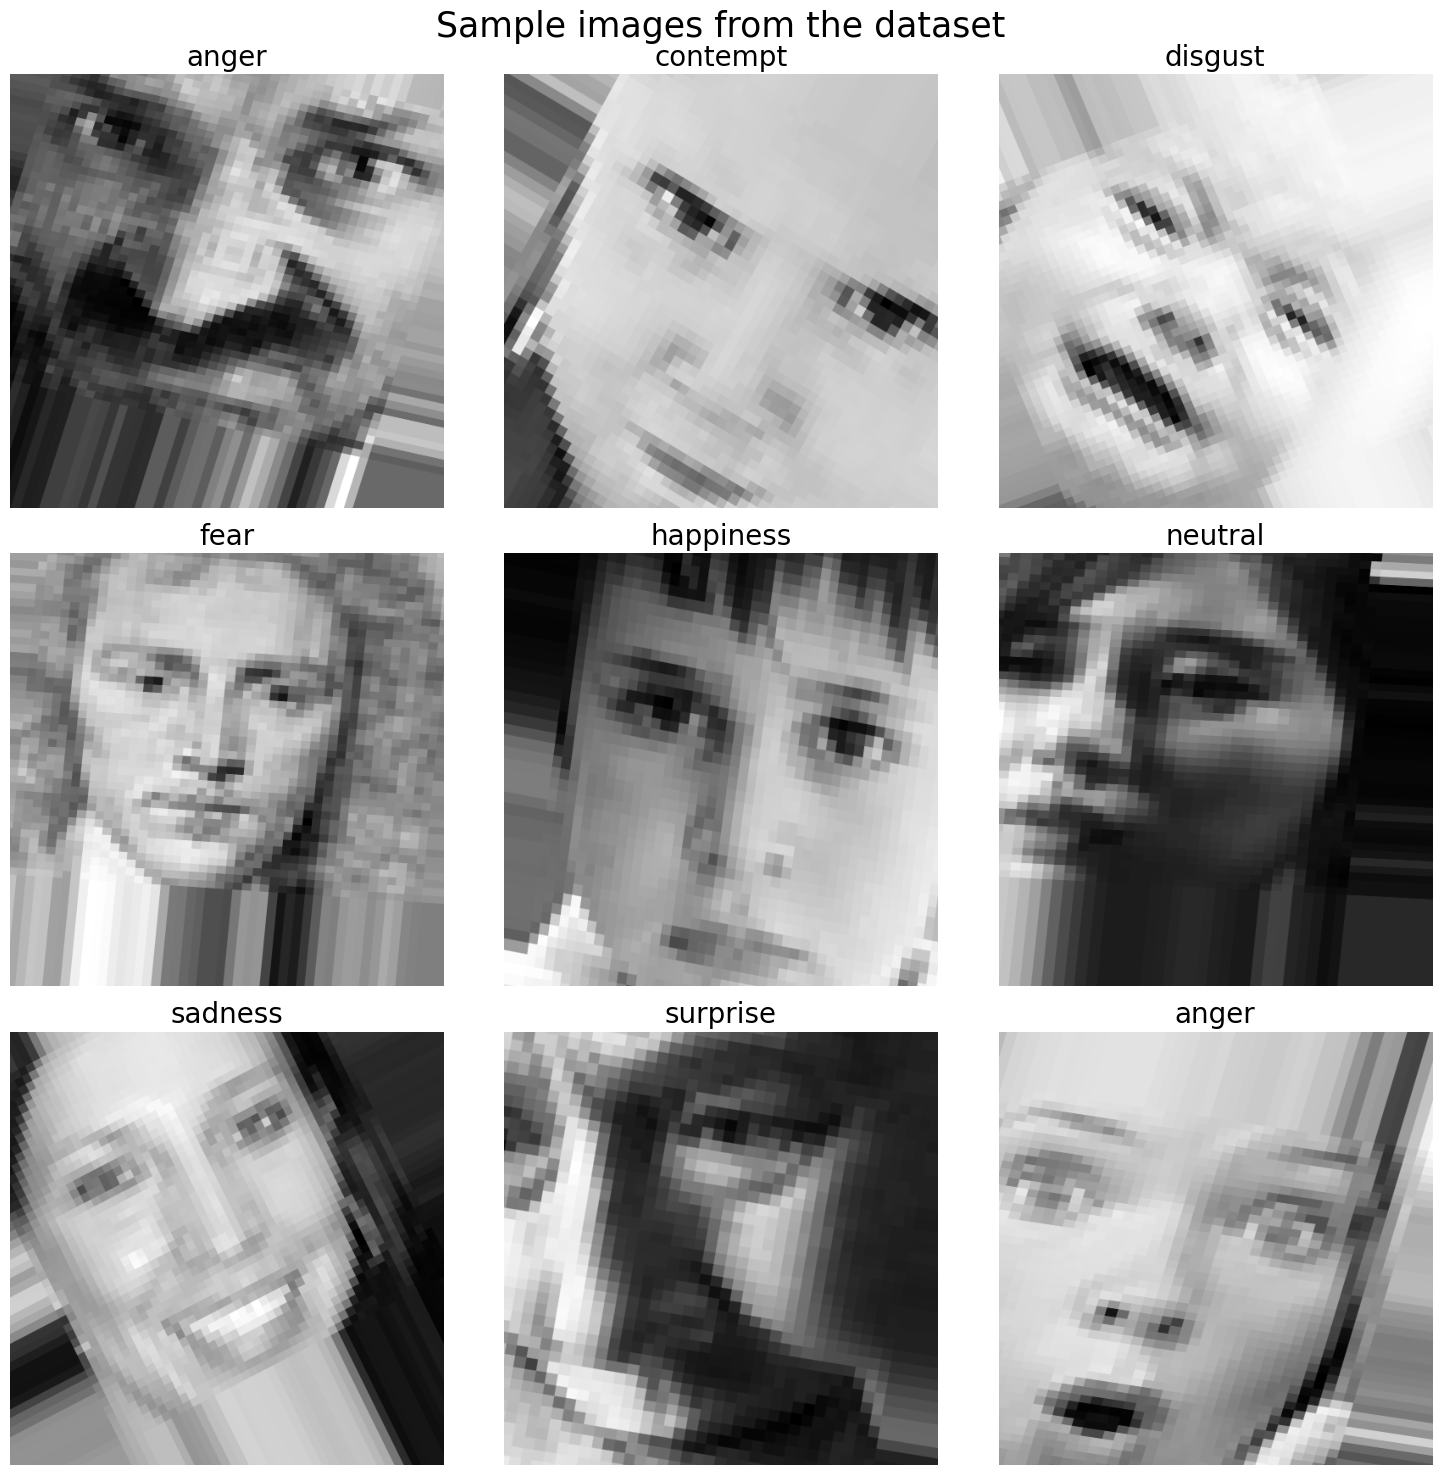

In [30]:
import matplotlib.pyplot as plt
class_names = train_ds.class_indices
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Sample images from the dataset", fontsize=25)

for i, ax in enumerate(axes.flat):
    class_index = i % len(class_names)
    class_name = list(class_names.keys())[list(class_names.values()).index(class_index)]
    image_index = np.argmax(train_ds[i][1][0])
    image = train_ds[i][0][image_index].reshape(512,512)
    
    ax.imshow(image, cmap="gray")
    ax.axis('off')
    ax.set_title(class_name,fontsize=20)

plt.tight_layout()
# plt.title("Sample images from the dataset")
plt.show()